In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score

from sklearn import metrics
from sklearn.metrics import make_scorer,accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay

c:\Users\katia\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Importando os dados:
url = "C:/Users/katia/Documents/Infnet/Aprendizado_supervsionado/winequalityN.csv"
#Lendo os dados com pandas
df = pd.read_csv(url)

In [3]:
#Conferindo os dados:
df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [9]:
#Selecionando apenas vinhos brancos:
df_white = df[df['type'] == 'white']
# QUESTAO 2: criando a variavel opinion categorica de 0 ou 1 a depender da nota do vinho:
df_white['opinion'] = df_white['quality'].apply(lambda x: 0 if x <= 5 else 1)
df_white.drop(columns = 'quality', inplace = True)
df_white.info()



<class 'pandas.core.frame.DataFrame'>
Index: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4898 non-null   object 
 1   fixed acidity         4890 non-null   float64
 2   volatile acidity      4891 non-null   float64
 3   citric acid           4896 non-null   float64
 4   residual sugar        4896 non-null   float64
 5   chlorides             4896 non-null   float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4891 non-null   float64
 10  sulphates             4896 non-null   float64
 11  alcohol               4898 non-null   float64
 12  opinion               4898 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 535.7+ KB


C:\Users\katia\AppData\Local\Temp\ipykernel_25700\3232536431.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white['opinion'] = df_white['quality'].apply(lambda x: 0 if x <= 5 else 1)
C:\Users\katia\AppData\Local\Temp\ipykernel_25700\3232536431.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white.drop(columns = 'quality', inplace = True)


In [ ]:
QUESTAO 3: 
Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? 
Quais são as médias e desvios padrões?

As variaveis categoricas são:"Opinion"
As demais são contínuas.



In [11]:
#médias e desvios:
df_white = df_white.dropna(axis=0)
df_white = df_white.drop_duplicates()
df_white.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
count,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000
mean,6.840297,0.280430,0.334490,5.918721,0.045887,34.918062,137.215753,0.993788,3.195287,0.490236,10.591945,0.659817
std,0.866067,0.103256,0.122404,4.861389,0.023088,17.227540,43.128509,0.002907,0.151345,0.113653,1.217787,0.473831
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991600,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,1.000000
75%,7.300000,0.328750,0.390000,8.875000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


QUESTAO 4: 
a) Descreva as etapas necessárias para criar um modelo de classificação eficiente.
O primeiro passo é normalizar o modelos para evitar o desbalanceamento de pesos causados pela escala das variáveis.
Depois dividimos o modelo entre treino e teste, o primeiro aprende e o seguindo faz a predição com base no que foi aprendido.
Com base no que o modelo aprendeu temos uma taxa de acerto e conseguimos ver os parametros de qualidade como recall, acuracia e precisão.


b)Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação.
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.

In [12]:
 

X = df_white[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide']]
y = df_white['opinion']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.30, random_state= 42, stratify= y)


In [18]:
reglog = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
reglog
yhat_reglog = reglog.predict(X_test)
yhat_reglog
y_proba_reglog = reglog.predict_proba(X_test)
y_proba_reglog
     

array([[0.38282617, 0.61717383],
       [0.39075643, 0.60924357],
       [0.22651558, 0.77348442],
       ...,
       [0.29440908, 0.70559092],
       [0.3995438 , 0.6004562 ],
       [0.34543532, 0.65456468]])

In [26]:
from sklearn.model_selection import cross_val_score
acuracias_reglog = cross_val_score(reglog, X_train, y_train, cv=10, scoring='accuracy')
precisoes_reglog = cross_val_score(reglog, X_train, y_train, cv=10, scoring='precision')
recalls_reglog = cross_val_score(reglog, X_train, y_train, cv=10, scoring='recall')
f1_scores_reglog = cross_val_score(reglog, X_train, y_train, cv=10, scoring='f1')


In [28]:
#i média e o desvio padrão da acurácia
mean_acuracia_reglog = np.mean(acuracias_reglog)
std_acuracia_reglog = np.std(acuracias_reglog)

print(f'Acurácias: {acuracias_reglog}')
print(f'Média da Acurácia: {mean_acuracia_reglog}')
print(f'Desvio Padrão da Acurácia: {std_acuracia_reglog}')

#

Acurácias: [0.66666667 0.64855072 0.67028986 0.67753623 0.65942029 0.63405797
 0.67753623 0.65942029 0.67028986 0.68727273]
Média da Acurácia: 0.6651040843214756
Desvio Padrão da Acurácia: 0.014694479656825389


In [29]:
#ii média e o desvio padrão da precisão
mean_precisao_reglog = np.mean(precisoes_reglog)
std_precisao_reglog = np.std(precisoes_reglog)

print(f'Acurácias: {precisoes_reglog}')
print(f'Média da Acurácia: {mean_precisao_reglog}')
print(f'Desvio Padrão da Acurácia: {std_precisao_reglog}')

Acurácias: [0.67175573 0.66932271 0.6743295  0.68379447 0.671875   0.66396761
 0.68093385 0.67054264 0.6812749  0.68604651]
Média da Acurácia: 0.6753842913834396
Desvio Padrão da Acurácia: 0.006833959873181554


In [30]:
#iii média e o desvio padrão do recall
mean_recall_reglog = np.mean(recalls_reglog)
std_recall_reglog = np.std(recalls_reglog)

print(f'Recalls: {recalls_reglog}')
print(f'Média do Recall: {mean_recall_reglog}')
print(f'Desvio Padrão do Recall: {std_recall_reglog}')

Recalls: [0.96703297 0.92307692 0.96703297 0.95054945 0.94505495 0.9010989
 0.96153846 0.95054945 0.93956044 0.97252747]
Média do Recall: 0.9478021978021978
Desvio Padrão do Recall: 0.021030394735169922


In [31]:
#iv média e o desvio padrão do F1-score
mean_f1_score_reglog = np.mean(f1_scores_reglog)
std_f1_score_reglog = np.std(f1_scores_reglog)

print(f'F1-scores: {f1_scores_reglog}')
print(f'Média do F1-score: {mean_f1_score_reglog}')
print(f'Desvio Padrão do F1-score: {std_f1_score_reglog}')

F1-scores: [0.79279279 0.77598152 0.79458239 0.7954023  0.78538813 0.76456876
 0.79726651 0.78636364 0.78983834 0.80454545]
Média do F1-score: 0.7886729843989877
Desvio Padrão do F1-score: 0.010874417995036209


c) Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
dTree = dTree.fit(X_train,y_train)
     
yhat_dTree = dTree.predict(X_test)
yhat_dTree
     

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [39]:
#Calculando as metricas:
acuracias_dTree = cross_val_score(dTree, X_train, y_train, cv=10, scoring='accuracy')
precisoes_dTree = cross_val_score(dTree, X_train, y_train, cv=10, scoring='precision')
recalls_dTree = cross_val_score(dTree, X_train, y_train, cv=10, scoring='recall')
f1_scores_dTree = cross_val_score(dTree, X_train, y_train, cv=10, scoring='f1')


In [40]:
#media e dp acuracia
media_acuracia_dTree = np.mean(acuracias_dTree)
std_acuracia_dTree = np.std(acuracias_dTree)

print(f'Acurácias: {acuracias_dTree}')
print(f'Média da Acurácia: {media_acuracia_dTree}')
print(f'Desvio Padrão da Acurácia: {std_acuracia_dTree}')

Acurácias: [0.70652174 0.71014493 0.72463768 0.72101449 0.69927536 0.66666667
 0.76449275 0.68115942 0.68478261 0.74181818]
Média da Acurácia: 0.7100513833992095
Desvio Padrão da Acurácia: 0.027910610966997755


In [41]:
#media e dp precisao
media_precisao_dTree = np.mean(precisoes_dTree)
std_dTree = np.std(precisoes_dTree)

print(f'Precisões: {precisoes_dTree}')
print(f'Média da Precisão: {media_precisao_dTree}')
print(f'Desvio Padrão da Precisão: {std_dTree}')

Precisões: [0.75897436 0.74056604 0.765      0.75862069 0.74626866 0.74193548
 0.79104478 0.735      0.75132275 0.76303318]
Média da Precisão: 0.7551765929750371
Desvio Padrão da Precisão: 0.015365969626209298


In [42]:
#media e dp recall
media_recall_dTree = np.mean(recalls_dTree)
std_recall_dTree = np.std(recalls_dTree)

print(f'Recalls: {recalls_dTree}')
print(f'Média do Recall: {media_recall_dTree}')
print(f'Desvio Padrão do Recall: {std_recall_dTree}')

Recalls: [0.81318681 0.86263736 0.84065934 0.85164835 0.82417582 0.75824176
 0.87362637 0.80769231 0.78021978 0.88461538]
Média do Recall: 0.8296703296703296
Desvio Padrão do Recall: 0.03869630079485497


In [43]:
#media e dp f1socre
media_f1_score_dTree = np.mean(f1_scores_dTree)
std_f1_score_dTree = np.std(f1_scores_dTree)

print(f'F1-scores: {f1_scores_dTree}')
print(f'Média do F1-score: {media_f1_score_dTree}')
print(f'Desvio Padrão do F1-score: {std_f1_score_dTree}')

F1-scores: [0.78514589 0.79695431 0.80104712 0.8        0.78328982 0.75
 0.83028721 0.77284595 0.76549865 0.81933842]
Média do F1-score: 0.7904407374918092
Desvio Padrão do F1-score: 0.02305521026332596


d)Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.


In [44]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhat_clf = clf.predict(X_test)
yhat_clf

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
acuracias_clf = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
precisoes_clf = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision')
recalls_clf = cross_val_score(clf, X_train, y_train, cv=10, scoring='recall')
f1_scores_clf = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')


In [46]:
#media e dp acuracia
media_acuracia_clf = np.mean(acuracias_clf)
std_acuracia_clf = np.std(acuracias_clf)

print(f'Acurácias: {acuracias_clf}')
print(f'Média da Acurácia: {media_acuracia_clf}')
print(f'Desvio Padrão da Acurácia: {std_acuracia_clf}')

Acurácias: [0.6557971  0.67028986 0.66304348 0.67391304 0.66304348 0.65217391
 0.66666667 0.66666667 0.64855072 0.67272727]
Média da Acurácia: 0.6632872200263505
Desvio Padrão da Acurácia: 0.00819018632655481


In [47]:
#media e dp precisao
media_precisao_clf = np.mean(precisoes_clf)
std_clf = np.std(precisoes_clf)

print(f'Precisões: {precisoes_clf}')
print(f'Média da Precisão: {media_precisao_clf}')
print(f'Desvio Padrão da Precisão: {std_clf}')
     

Precisões: [0.66539924 0.6770428  0.66542751 0.67692308 0.66792453 0.66412214
 0.66666667 0.67045455 0.66159696 0.67424242]
Média da Precisão: 0.6689799887561911
Desvio Padrão da Precisão: 0.005176720351873897


In [48]:
#media e dp recall
media_recall_clf = np.mean(recalls_clf)
std_recall_clf = np.std(recalls_clf)

print(f'Recalls: {recalls_clf}')
print(f'Média do Recall: {media_recall_clf}')
print(f'Desvio Padrão do Recall: {std_recall_clf}')

Recalls: [0.96153846 0.95604396 0.98351648 0.96703297 0.97252747 0.95604396
 0.98901099 0.97252747 0.95604396 0.97802198]
Média do Recall: 0.9692307692307693
Desvio Padrão do Recall: 0.011313879275809869


In [49]:
#media e dp f1score:
media_f1_score_clf = np.mean(f1_scores_clf)
std_f1_score_clf = np.std(f1_scores_clf)

print(f'F1-scores: {f1_scores_clf}')
print(f'Média do F1-score: {media_f1_score_clf}')
print(f'Desvio Padrão do F1-score: {std_f1_score_clf}')

F1-scores: [0.78651685 0.79271071 0.79379157 0.79638009 0.79194631 0.78378378
 0.79646018 0.79372197 0.78202247 0.79820628]
Média do F1-score: 0.7915540217390997
Desvio Padrão do F1-score: 0.005285947168006201


QUESTAO 5
Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. 
Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.

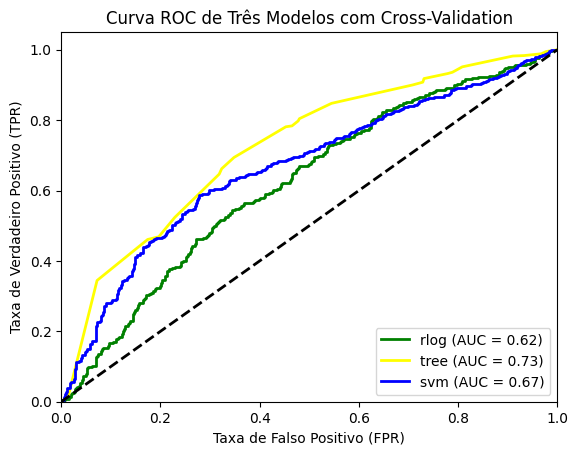

In [52]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import StratifiedGroupKFold
from itertools import cycle

# Supondo que você tenha três modelos treinados anteriormente
modelo_rlog = reglog
modelo_tree = dTree
modelo_svm = clf

# Binariza as classes usando label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1])

# Função para calcular e plotar a curva ROC para um modelo específico
def plot_roc_curve(modelo, nome_modelo, color):
  if hasattr(modelo, "decision_function"):
     y_score = modelo.decision_function(X_test)
  elif hasattr(modelo, "predict_proba"):
      prob_pos = modelo.predict_proba(X_test)[:, 1]
      y_score = prob_pos
  else:
     raise AttributeError("Modelo não possui 'decision_function' nem 'predict_proba'")

  fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, color=color, lw=2, label=f'{nome_modelo} (AUC = {roc_auc:.2f})')
  # Cores para os modelos
cores = cycle(['green', 'yellow', 'blue'])

# Plota a curva ROC para cada modelo
plot_roc_curve(modelo_rlog, 'rlog', next(cores))
plot_roc_curve(modelo_tree, 'tree', next(cores))
plot_roc_curve(modelo_svm, 'svm', next(cores))

# Configurações do gráfico
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC de Três Modelos com Cross-Validation')
plt.legend(loc="lower right")
plt.show()

Resposta 5:
Pelo apresentado na curva ROC o melhor modelo é a aravore de decisão que apresentou maior valor. Vale destacar que o eixo X é a proporção de exemplos negativos que foram incorretamente classificados como positivos e o eixo Y é representa a proporção de exemplos positivos que foram corretamente classificados como positivos.
Valores de 0 a 0,5 mostram que os modelos classificam aleatoriamente.